In [1]:
import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
def grouped_pointplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.pointplot(x=x, y=y, hue=hue, data=df, size=8, estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax)

    sns.despine(ax=ax, left=True)
    ax.set_title(title,fontsize=24)
    ax.set_ylabel(y,fontsize=20)
    ax.set_xlabel(x,fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=0, xmax=10, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1.35, .65), ncol=2,fontsize=16)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=3.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2, fontsize=16)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [4]:
def chance_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')                                          

In [5]:
def level_grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, hue_order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=10.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2, fontsize=16)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [6]:
all_data_dir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/'

In [7]:
figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

## Find accuracy by each level 

In [8]:
analysis_name = 'level_analysis_ind'

In [9]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [10]:
params =glob.glob(os.path.join(data_dir, '*'))

In [11]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_ind/isfc_PCA_mexican_hat_5']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


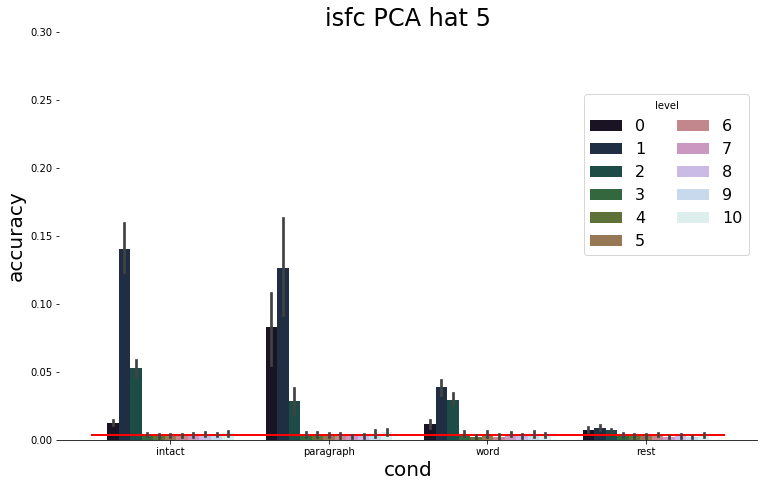

In [12]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.close()

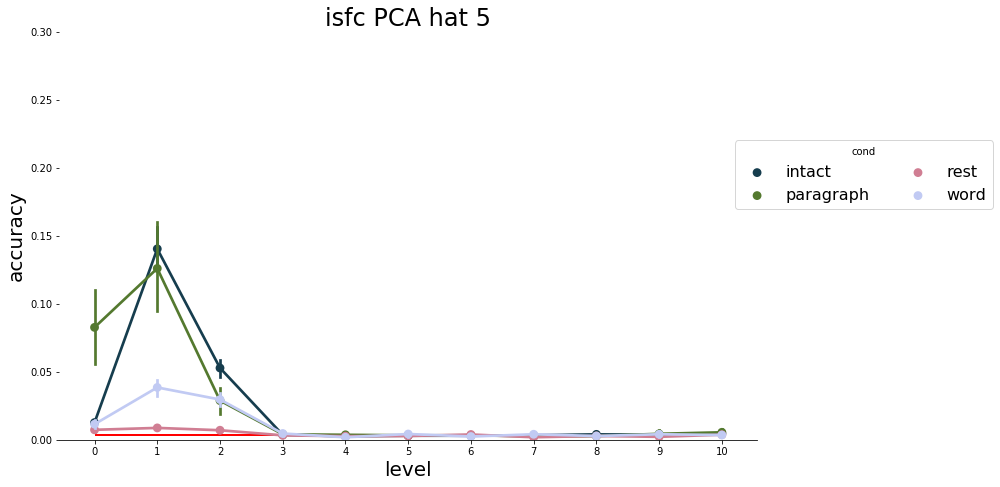

In [13]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_pointplot(full_data[full_data['level']<=10], 'level', 'accuracy','cond', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.show()
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


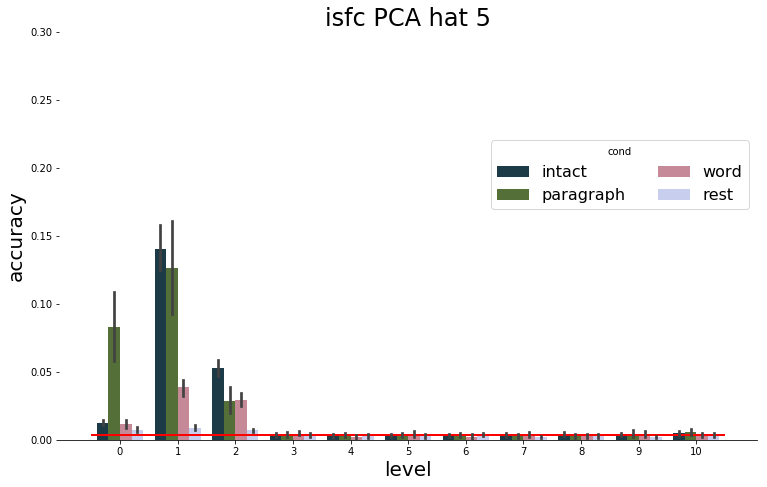

In [14]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    level_grouped_barplot(full_data[full_data['level']<=10],'level', 'accuracy', 'cond', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.close()

## Plot proportion of peak accuracy 

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


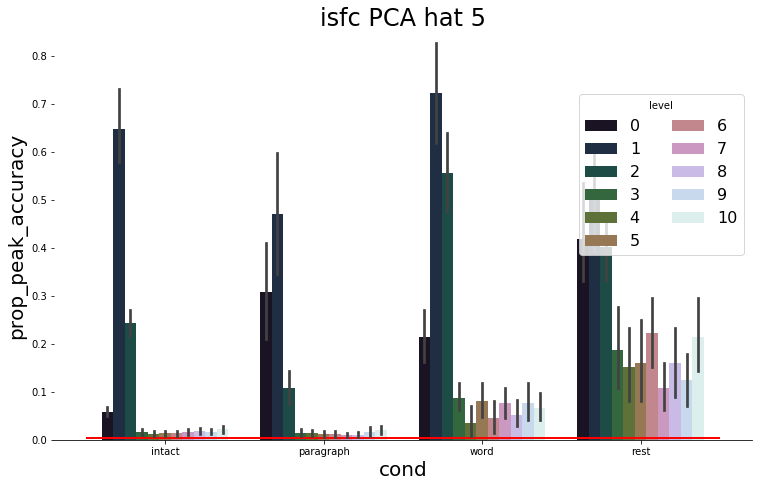

In [15]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['prop_peak_accuracy'] = data['accuracy']/data['accuracy'].max()
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
            
    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_peakprop_'+ analysis_name + '.pdf')
    grouped_barplot(full_data[full_data['level']<=10], 'cond', 'prop_peak_accuracy', 'level', ymin=0, ymax=.85, title=title, outfile=outfile)
    plt.close()

## Find optimimal level

In [21]:
analysis_name = 'level_analysis_optimized'

In [22]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [23]:
params =glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


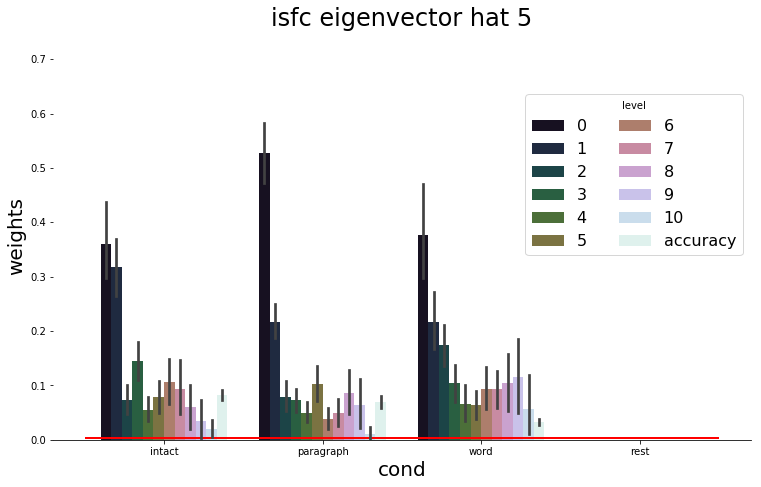

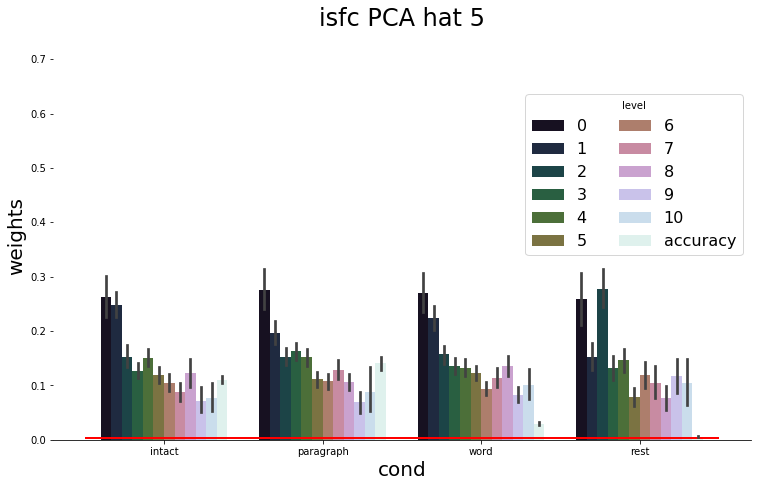

In [24]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

In [26]:
full_data

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,rank,iteration,cond,max_level
0,0,0.010000,0.307822,0,0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625867,1,intact,10
1,0,0.090000,0.186078,0,1,0.585140,0.414860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.855233,1,intact,11
2,0,0.103333,0.169211,0,2,0.333345,0.333336,NaN,3.333188e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.871822,1,intact,12
3,0,0.090000,0.188211,0,3,0.307367,0.180538,NaN,2.540017e-01,2.580929e-01,NaN,NaN,NaN,NaN,NaN,NaN,0.847644,1,intact,13
4,0,0.123333,0.162889,0,4,0.340851,0.402345,NaN,2.785251e-17,2.460179e-01,1.078585e-02,NaN,NaN,NaN,NaN,NaN,0.876456,1,intact,14
5,0,0.093333,0.173933,0,5,0.221969,0.184789,NaN,2.619875e-02,3.469326e-18,3.477538e-01,2.192888e-01,NaN,NaN,NaN,NaN,0.862889,1,intact,15
6,0,0.123333,0.151111,0,6,0.139046,0.232866,NaN,5.322213e-22,1.336982e-01,2.152758e-01,1.628824e-01,1.162323e-01,NaN,NaN,NaN,0.883389,1,intact,16
7,0,0.146667,0.146200,0,7,0.056113,0.178758,NaN,1.540061e-16,9.733509e-02,9.716248e-02,1.512196e-01,1.485903e-01,2.708210e-01,NaN,NaN,0.886989,1,intact,17
8,0,0.086667,0.188344,0,8,0.154399,0.091978,NaN,3.814751e-17,8.616385e-02,1.324261e-02,2.936265e-06,3.622600e-01,2.919534e-01,7.772433e-21,NaN,0.844656,1,intact,18
9,0,0.133333,0.150667,0,9,0.082408,0.131041,NaN,5.143223e-07,8.115582e-02,1.531388e-01,1.031273e-03,1.141788e-01,3.371610e-01,1.997020e-02,0.079915,0.881633,1,intact,19


/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


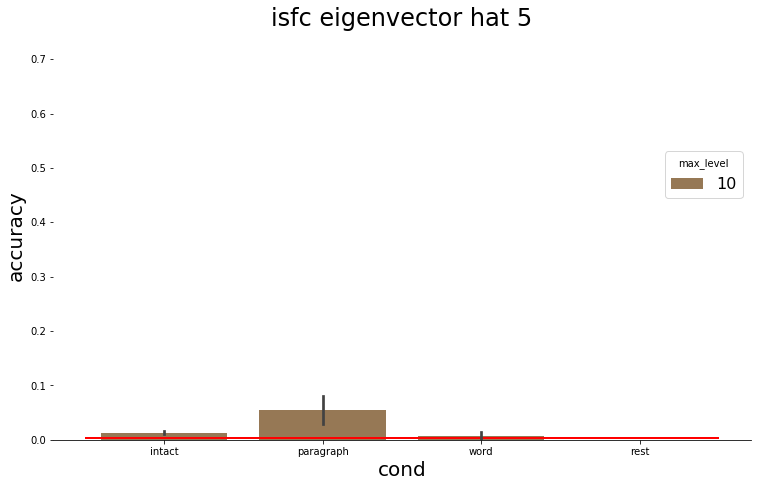

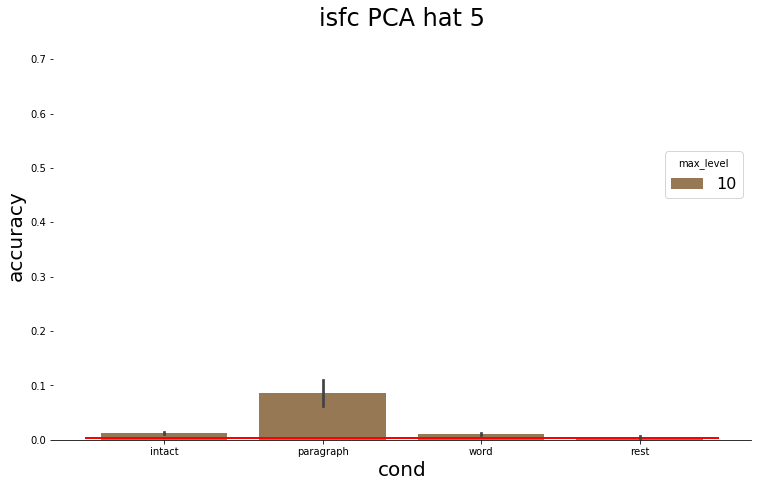

In [25]:
# ## for 100
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['cond'] = os.path.basename(os.path.splitext(c)[0])
#         data['max_level'] = 20 - data.isnull().sum(axis=1)
#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)



#     p_split = param_name.split('_')

#     title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

#     outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
#     grouped_barplot(full_data[full_data['max_level']<=10], 'cond', 'accuracy', 'max_level', ymin=0, ymax=.75, title=title, outfile=outfile)
#     plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


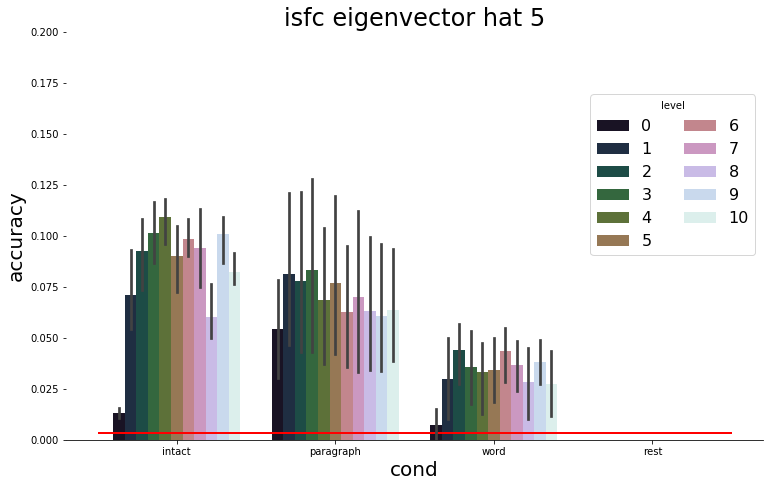

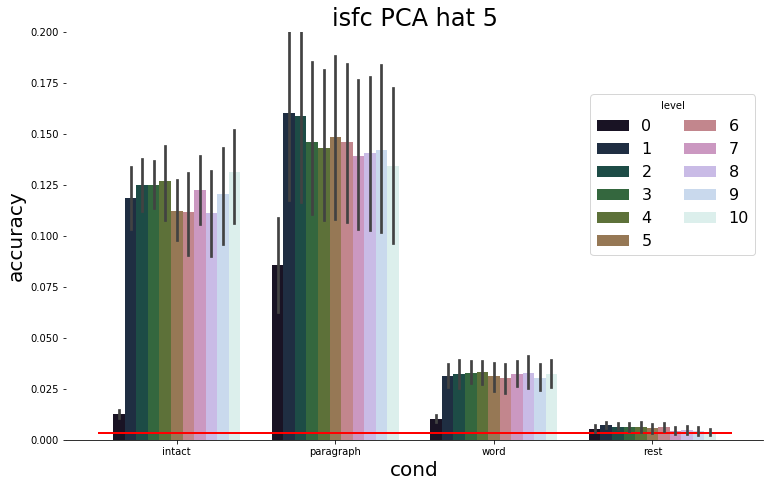

In [28]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        #data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(full_data[full_data['level']<=10], 'cond', 'accuracy', 'level', ymin=0, ymax=.2, title=title, outfile=outfile)
    plt.close()

In [ ]:
# ### for 100
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['cond'] = os.path.basename(os.path.splitext(c)[0])
#         data['max_level'] = 20 - data.isnull().sum(axis=1)
#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)



#     p_split = param_name.split('_')

#     title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

#     outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
#     grouped_pointplot(full_data[full_data['max_level']<=10], 'max_level', 'accuracy','cond', ymin=0, ymax=.3, title=title, outfile=outfile)
#     plt.show()
#     plt.close()

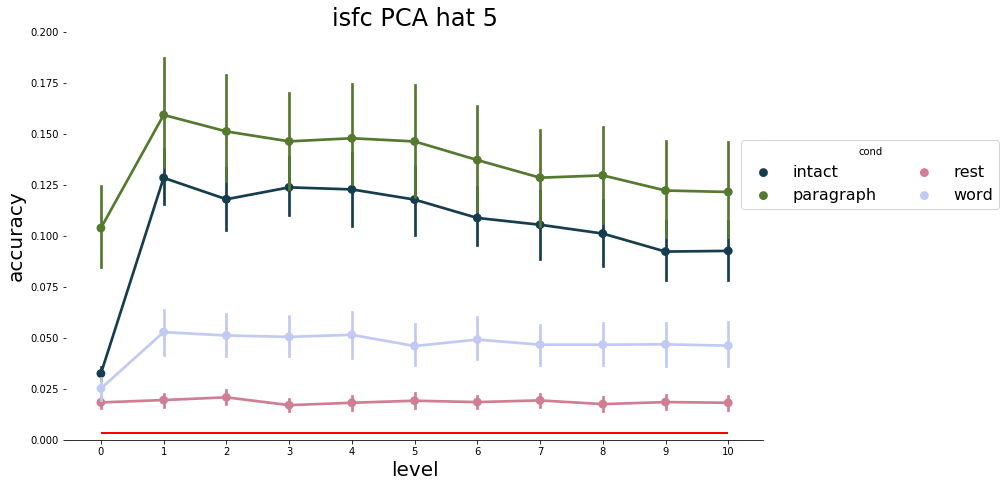

In [49]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_pointplot(full_data[full_data['level']<=10], 'level', 'accuracy','cond', ymin=0, ymax=.2, title=title, outfile=outfile)
    plt.show()
    plt.close()

In [31]:
# ## rest
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     c = glob.glob(os.path.join(p, 'rest*'))[0]

#     full_data = pd.DataFrame()
#     data = pd.read_csv(c)
#     data['cond'] = os.path.basename(os.path.splitext(c)[0])
#     data['max_level'] = 20 - data.isnull().sum(axis=1)
#     if full_data.empty:
#         full_data = data
#     else:
#         full_data = full_data.append(data)



#     p_split = param_name.split('_')

#     title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

#     #outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
#     chance_barplot(full_data, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.02, title=title, outfile=outfile)
#     plt.close()

## For peak accuracy by level

In [32]:
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     levs = []
#     cs = []
#     for c in conds:
#         data = pd.read_csv(c)
#         data['cond'] = os.path.basename(os.path.splitext(c)[0])
#         data['max_level'] = 20 - data.isnull().sum(axis=1)
#         df = data.groupby(['max_level'], as_index=False)['accuracy'].mean()
#         levs.append(df[df['accuracy'] == df.max()['accuracy']]['max_level'].values[0])
#         cs.append(os.path.basename(os.path.splitext(c)[0]))

#     full_data = pd.DataFrame({'level':levs, 'cond':cs})
#     sns.barplot(x='cond', y='level', color='k', data=full_data).set_title(param_name)
#     plt.show()

## Optimize weights time-chunked

In [33]:
analysis_name = 'level_analysis_chunked'

In [34]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [41]:
params = glob.glob(os.path.join(data_dir, '*'))

In [42]:
### for 100
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['cond'] = os.path.basename(os.path.splitext(c)[0])
#         data['max_level'] = 20 - data.isnull().sum(axis=1)
#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)

#     for t in range(3):
        
#         full_data_third = full_data[full_data['third'] == t]

#         p_split = param_name.split('_')

#         title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


#         outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
#         grouped_barplot(full_data_third[full_data_third['max_level']<=10], 'cond', 'accuracy', 'max_level', ymin=0, ymax=.65, title=title, outfile=outfile)
#         plt.close()
        
        

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_chunked/isfc_PCA_mexican_hat_5']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


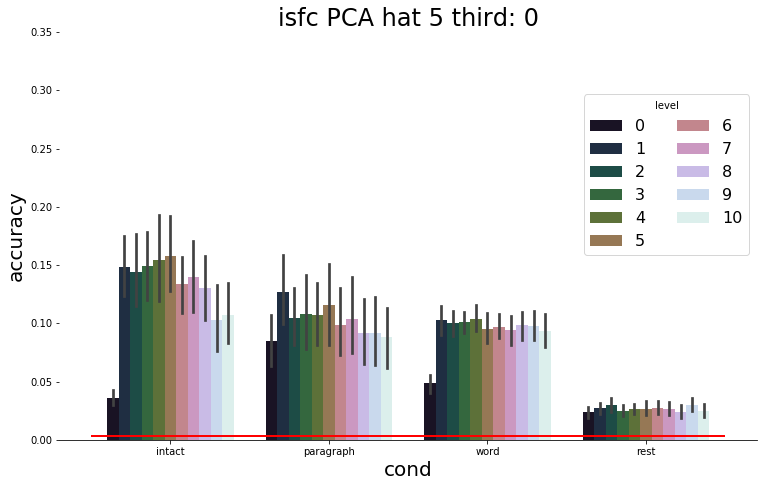

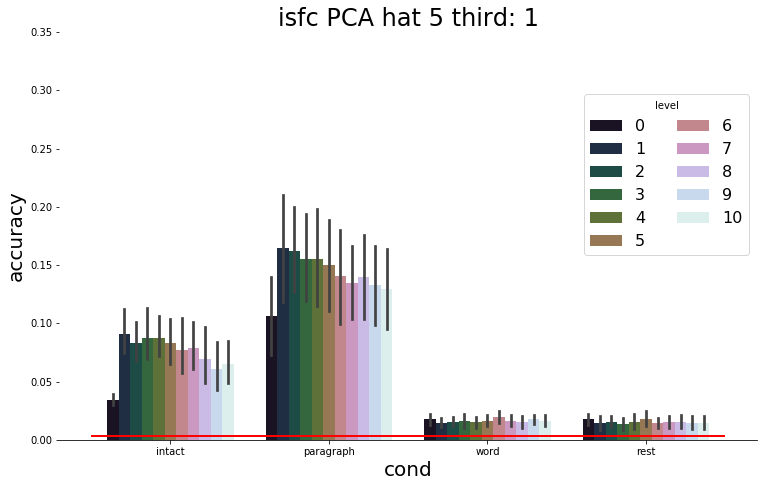

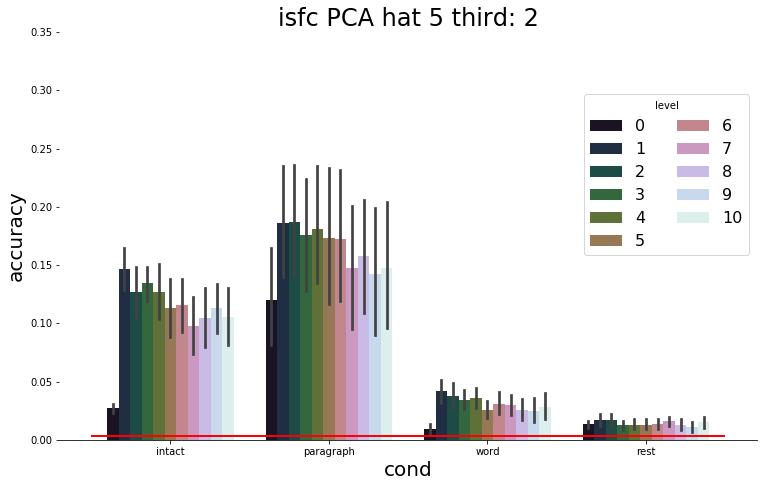

In [45]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        
        full_data_third = full_data[full_data['third'] == t]

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
        grouped_barplot(full_data_third[full_data_third['level']<=10], 'cond', 'accuracy', 'level', ymin=0, ymax=.35, title=title, outfile=outfile)
        plt.close()
        
        

In [ ]:
# ## for 100
# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['cond'] = os.path.basename(os.path.splitext(c)[0])
#         data['max_level'] = 20 - data.isnull().sum(axis=1)
#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)

#     for t in range(3):
        
#         full_data_third = full_data[full_data['third'] == t]

#         p_split = param_name.split('_')

#         title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


#         outfile = os.path.join(figdir, param_name + '_line_'+ str(t) + '_accuracy.pdf')
#         grouped_pointplot(full_data_third[full_data_third['max_level']<=10], 'max_level', 'accuracy','cond', ymin=0, ymax=.4, title=title, outfile=outfile)
#         plt.show()
#         plt.close()
        

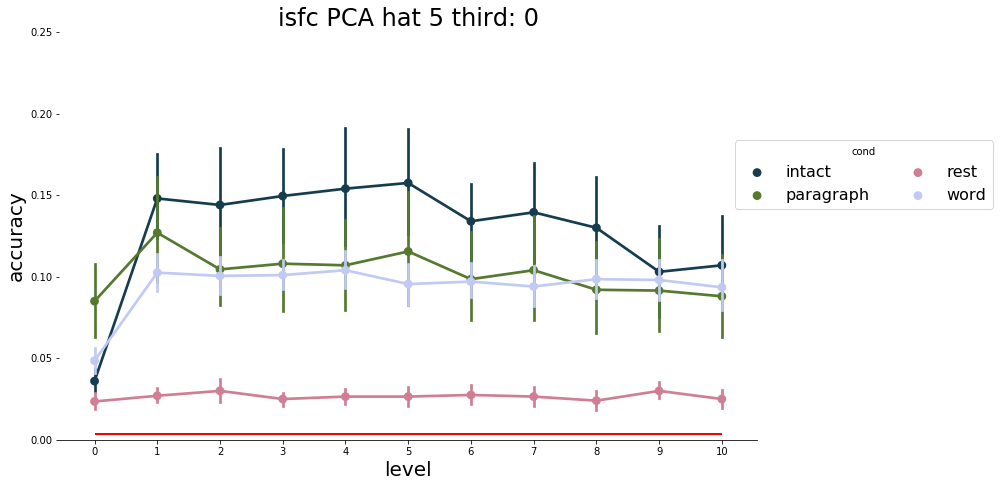

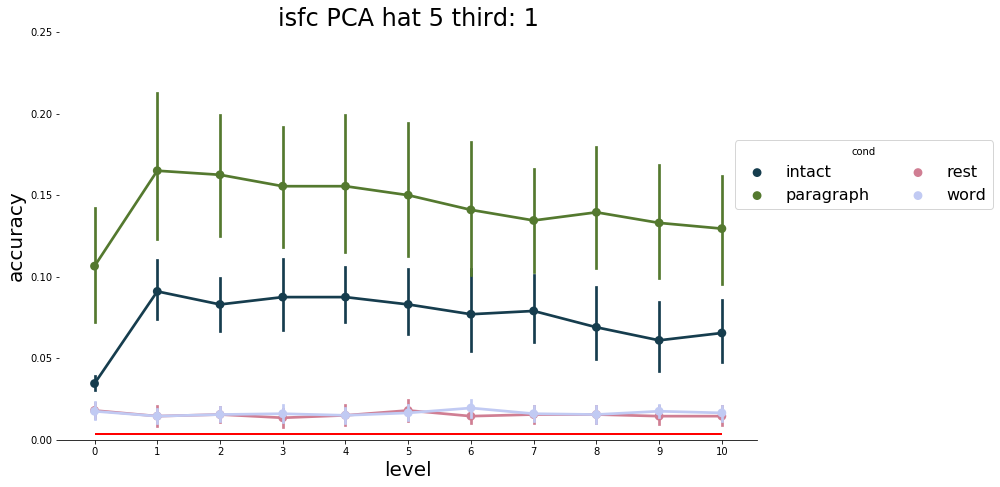

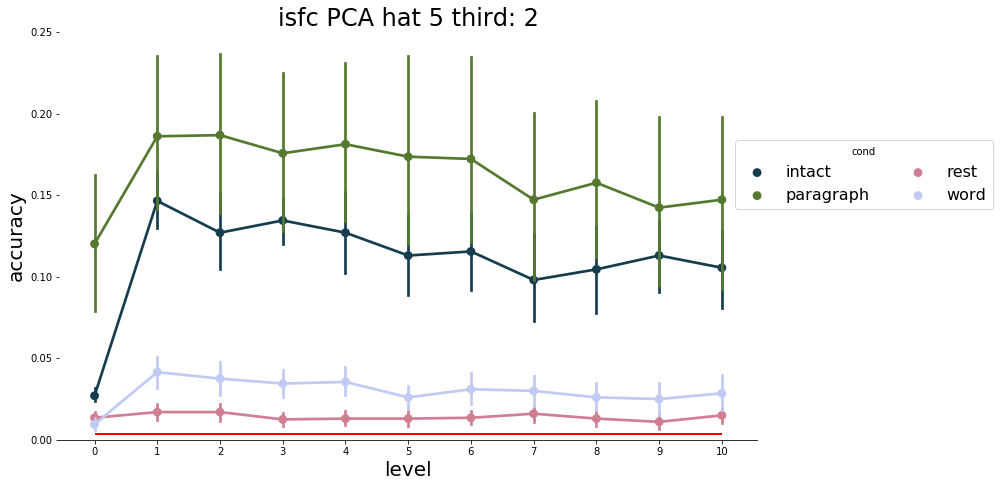

In [50]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        
        full_data_third = full_data[full_data['third'] == t]

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_line_'+ str(t) + '_accuracy.pdf')
        grouped_pointplot(full_data_third[full_data_third['level']<=10], 'level', 'accuracy','cond', ymin=0, ymax=.25, title=title, outfile=outfile)
        plt.show()
        plt.close()
        

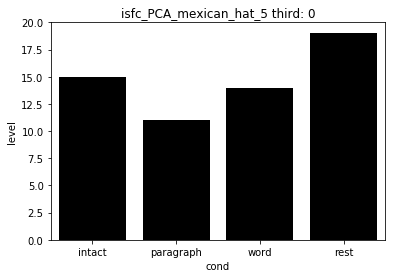

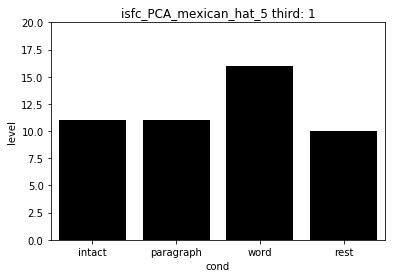

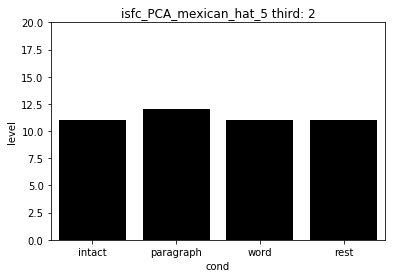

In [51]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = ['intact', 'paragraph', 'word', 'rest']
    
    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
        
    cs = ['intact', 'paragraph', 'word', 'rest']
            
    for t in range(3):
        data_third = full_data[full_data['third'] == t]

        levs = []

        df = data_third.groupby(['max_level', 'cond'], as_index=False)['accuracy'].mean()
        for c in cs:
            cond_df = df[df['cond'] == c]
            levs.append(cond_df[cond_df['accuracy'] == cond_df.max()['accuracy']]['max_level'].values[0])

        tmp_df = pd.DataFrame({'level':levs, 'cond':cs})
        g = sns.barplot(x='cond', y='level', color='k', data=tmp_df).set_title(param_name + ' third: ' + str(t))
        plt.ylim(0, 20)
        plt.show()

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


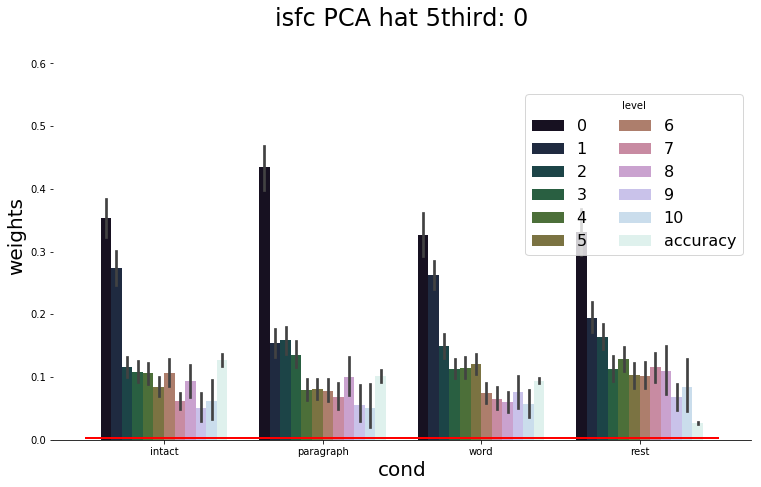

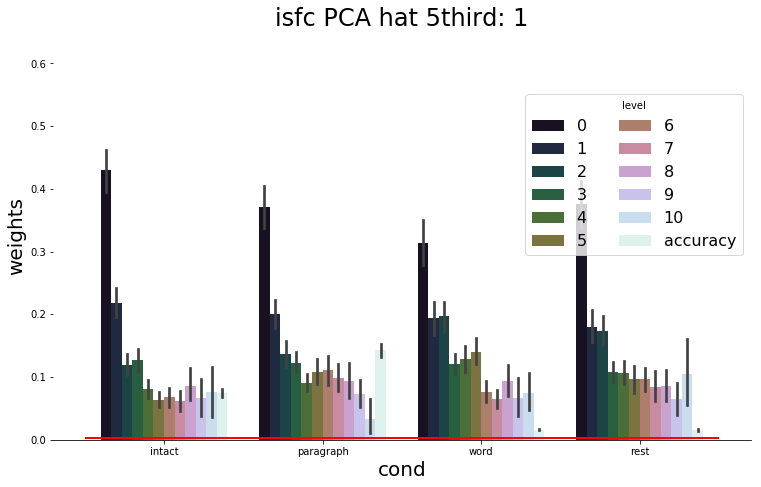

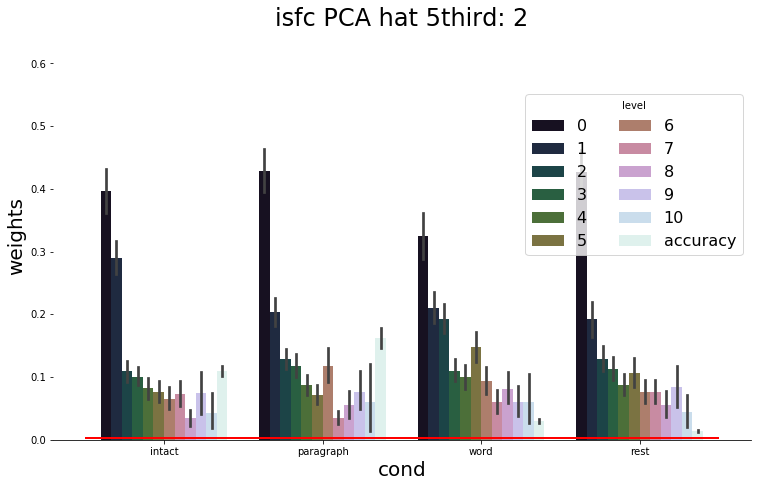

In [52]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        melted_df = pd.DataFrame()
        full_data_third = full_data[full_data['third'] == t]

        for c in np.arange(full_data_third['level'].max() + 2):
            if c!=full_data_third['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['level_' + str(c)]
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data_third['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['accuracy']
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data_third['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data_third['error'] = 1-full_data_third['error']

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + 'third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
        grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.65, title=title, outfile=outfile)
        plt.close()

## Mixing analysis

In [53]:
analysis_name = 'level_analysis_mixing'

In [54]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [55]:
params = glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


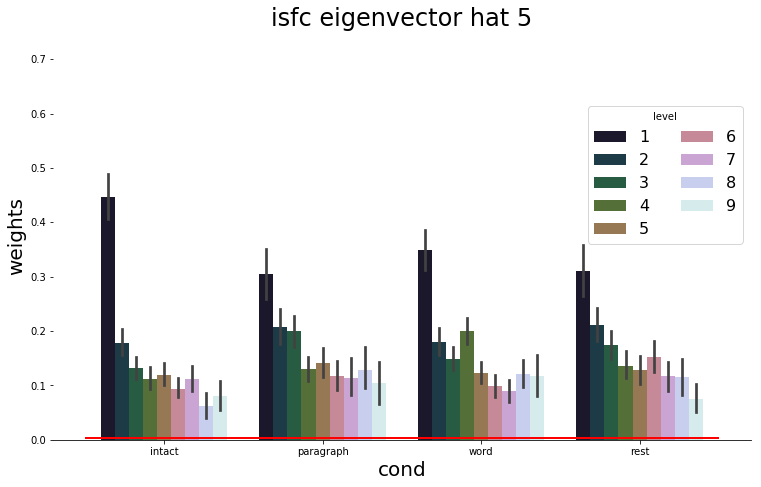

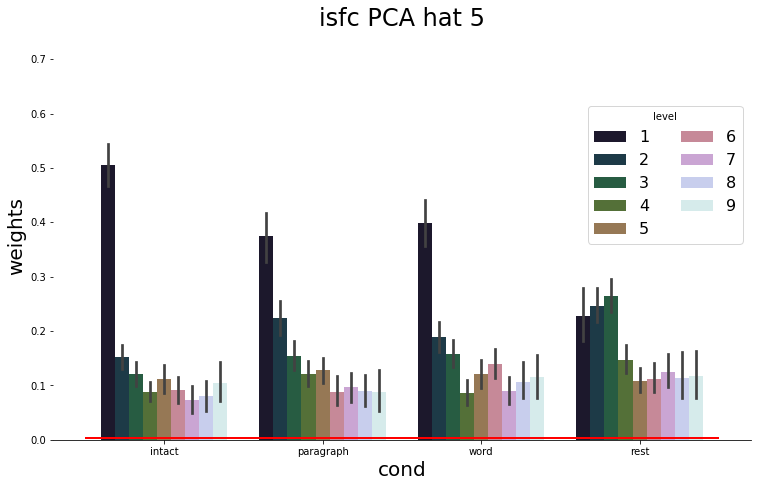

In [56]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(1, full_data['level'].max()):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


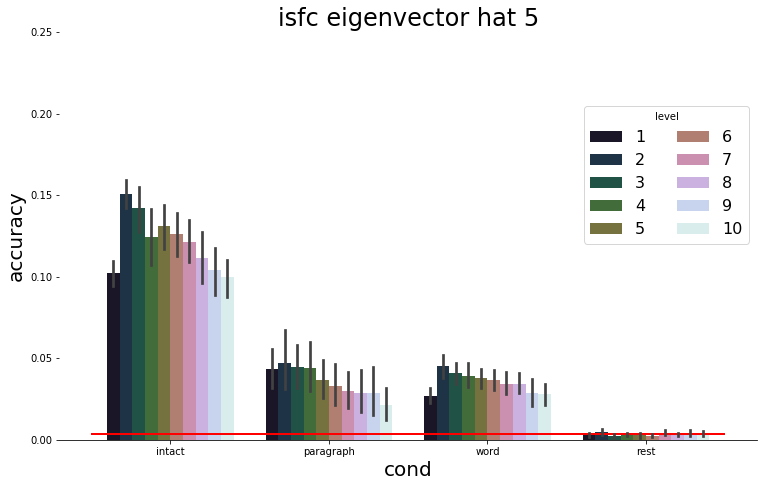

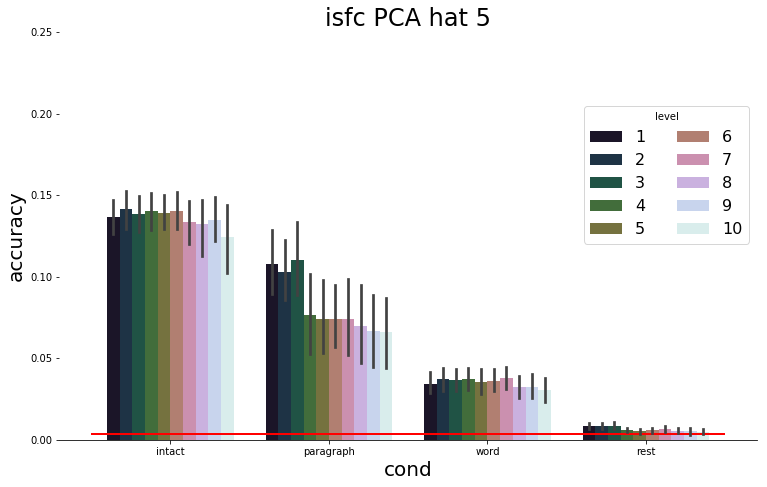

In [57]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data[full_data['level']<=10], 'cond', 'accuracy', 'level', ymin=0, ymax=.25, title=title, outfile=outfile)
    plt.close()

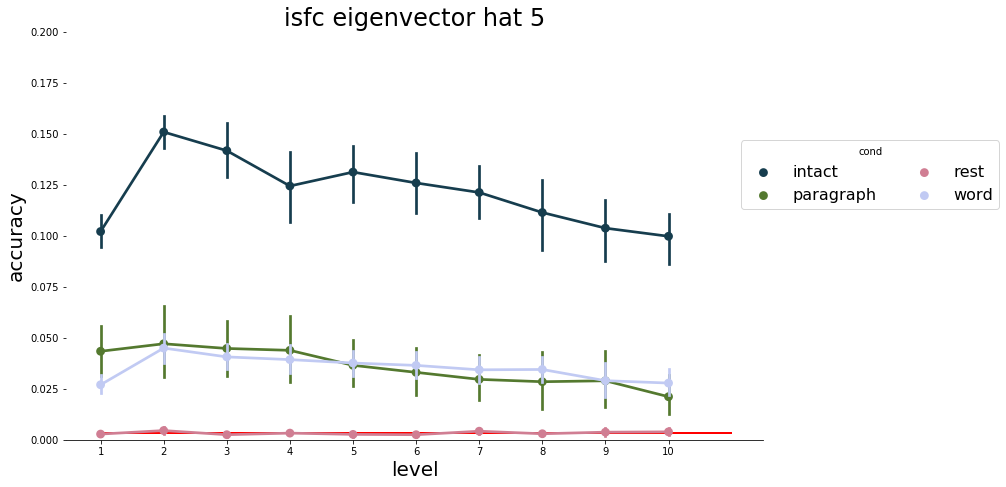

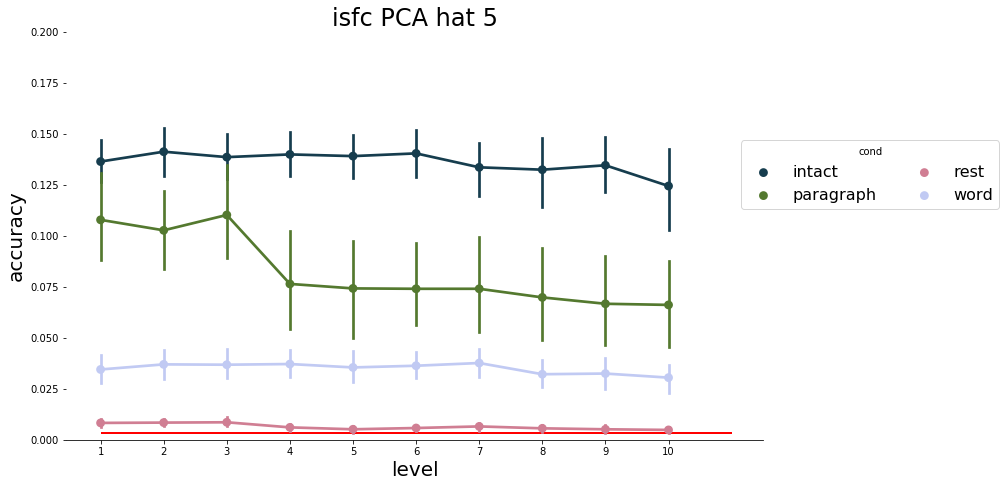

In [58]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        #data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_pointplot(full_data, 'level', 'accuracy','cond', ymin=0, ymax=.2, title=title, outfile=outfile)
    plt.show()
    plt.close()

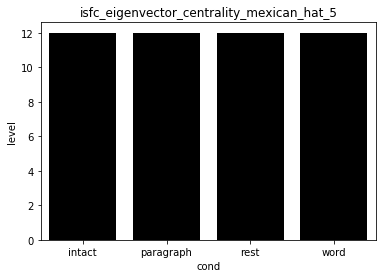

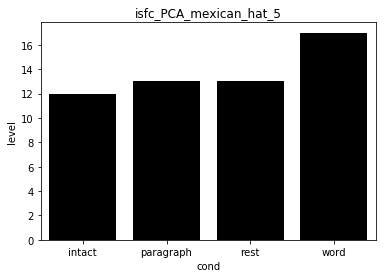

In [59]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = []
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        df = data.groupby(['max_level'], as_index=False)['accuracy'].mean()
        levs.append(df[df['accuracy'] == df.max()['accuracy']]['max_level'].values[0])
        cs.append(os.path.basename(os.path.splitext(c)[0]))

    full_data = pd.DataFrame({'level':levs, 'cond':cs})
    sns.barplot(x='cond', y='level', color='k', data=full_data).set_title(param_name)
    plt.show()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


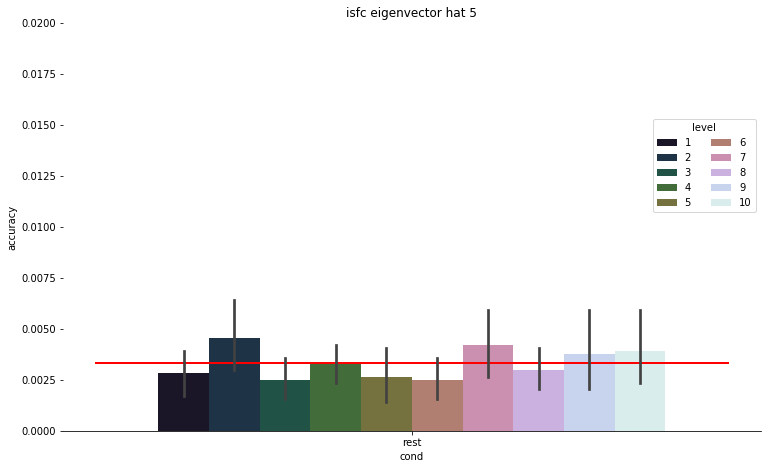

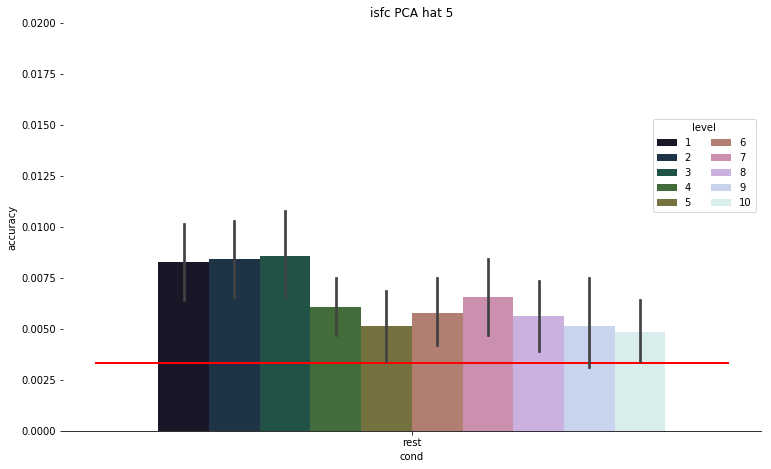

In [60]:
## rest
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    c = glob.glob(os.path.join(p, 'rest*'))[0]

    full_data = pd.DataFrame()
    data = pd.read_csv(c)
    data['cond'] = os.path.basename(os.path.splitext(c)[0])
    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    #outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.pdf')
    chance_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.02, title=title, outfile=outfile)
    plt.close()